Range of Tracks: 200
Head pointer is 60
start point in the list is 67

(67 - 60) + (79 - 67) + (99 - 79) + (131 - 99) + (152 - 131) + (176 - 152) + (183 - 176) + (199 - 183) + (0 - 199) + (23 - 0) + (42 - 23) + (58 - 42) = 396

total number of cylinders is 396
Average seek time : 39.6
Throughput : 0.025252525252525252

60 --> 67 --> 79 --> 99 --> 131 --> 152 --> 176 --> 183 --> 199 --> 0 --> 23 --> 42 --> 58

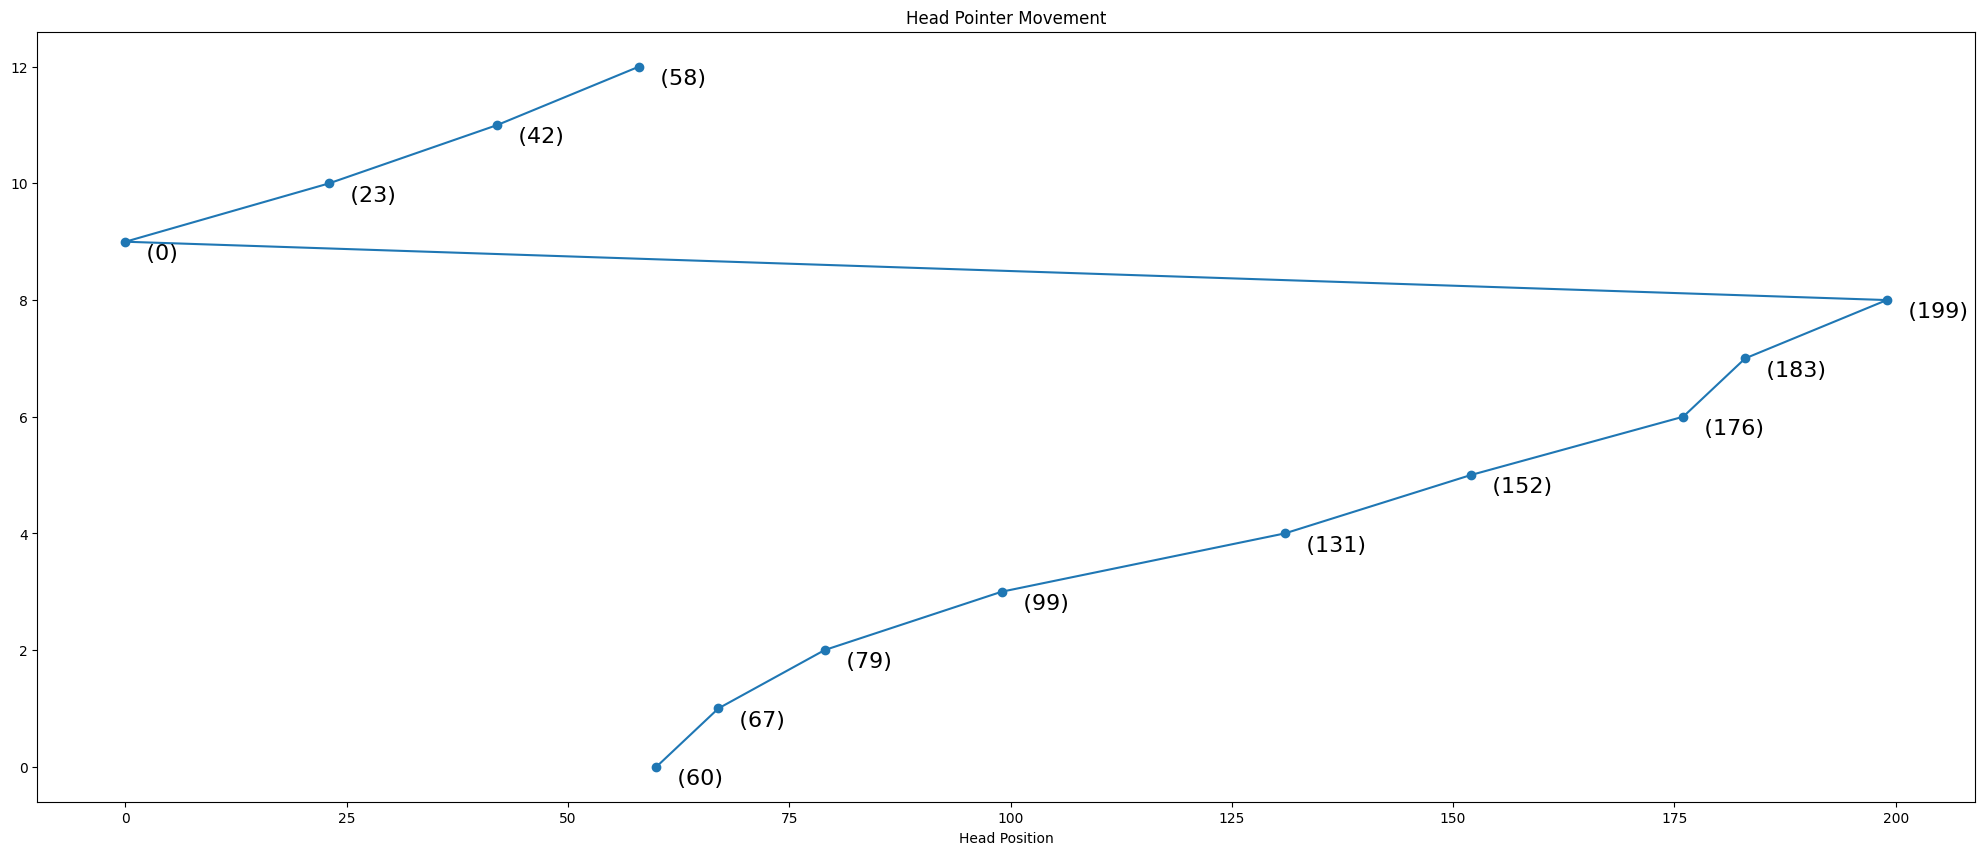

In [2]:
import matplotlib.pyplot as plt

total_tracks_is_disk = 200
print(f'Range of Tracks: {total_tracks_is_disk}')

tracks = [67, 152, 23, 176, 99, 42, 183, 58, 131, 79]
n = len(tracks)

back = [0]
start_point = tracks[0]
front = [199]
head_pointer = 60
print(f'Head pointer is {head_pointer}')

started = False
started1 = False
number_of_cylinders = []
head_positions = []
head_positions.append(head_pointer)

forwarded = (
    True
    if head_pointer < tracks[0]
    or (head_pointer == tracks[0] and head_pointer < tracks[1])
    else False
)


while tracks:
    current_track = tracks[0]
    if (current_track < head_pointer and current_track <= start_point) or (head_pointer == tracks[0] and tracks[0] > tracks[1] and not started1):
        back.append(current_track)
    else:
        front.append(current_track)
    started1 = True
    tracks.remove(current_track)


front = sorted(front)
back = sorted(back)
tracks = front + back if forwarded else sorted(back, reverse=True ) + sorted(front,reverse=True)


while tracks:
    next_pos = tracks[0]
    print(f'start point in the list is {next_pos}\n\n({next_pos} - {head_pointer})', end=' + ') if not started else print(f'({next_pos} - {head_pointer})', end=' + ' if len(tracks)> 1 else '')
    started = True
    
    
    number_of_cylinders.append(abs(next_pos - head_pointer))
    tracks.remove(next_pos)
    head_pointer = next_pos
    head_positions.append(head_pointer)

print(f' = {sum(number_of_cylinders)}')
print()
print(f'total number of cylinders is {sum(number_of_cylinders)}')
print(f'Average seek time : {(sum(number_of_cylinders))/n}')
print(f'Throughput : {n/(sum(number_of_cylinders))}')
print()

for pointers in head_positions:
    print(f'{pointers}',end=' --> ' if pointers != head_positions[-1] else '')

time = range(len(head_positions))
plt.figure(figsize=(25, 10))
plt.plot(head_positions, time, marker='o') 

plt.xlabel('Head Position') 
plt.title('Head Pointer Movement')
for i, (pos, t) in enumerate(zip(head_positions, time)):
    plt.text(pos, t, f'\n   ({pos})', ha='left', va='center',fontsize = 16) 
plt.show()